# The `Basis` class
## Polynomial basis functions

geothermax uses polynomial approximations for the borehole wall temperature and heat extraction rate profiles along the boreholes. Given $N$ nodal values $f_n = f(\xi_n)$ of a function $f$, the function can be approximated at any coordinate $\xi$:
$$
\hat{f}(\xi) = \sum_{n=1}^N \psi_n(\xi) \cdot f_n
$$
where $\psi_n(\xi)$ are polynomial basis functions:
$$
\psi_n(\xi) = a_{n,0} + a_{n,1} \cdot \xi + a_{n,2} \cdot \xi^2 + \cdots + a_{n,N-1} \cdot \xi^{N-1}
$$
with coefficients $a_{n,m}$ that depend solely on the coordinates $\xi_n$ of the nodes along the interval $[-1,1]$.

Basis functions have the convenient property:
$$
\psi_n(\xi_m) = \begin{cases*} 1 & \text{if $m=n$} \\ 0 & \text{if $m \neq n$} \end{cases*}
$$

In [1]:
# Import necessary packages
import geothermax as gm

import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator

## Basis functions from node coordinates
The `Basis` class can be instantiated given node coordinates. For example, using 5 uniformly spaced nodes:

In [2]:
n_nodes = 5
xi = jnp.linspace(-1., 1., num=n_nodes)
basis = gm.Basis(xi)

Basis functions can be evaluated using the `Basis.f_psi` class method:

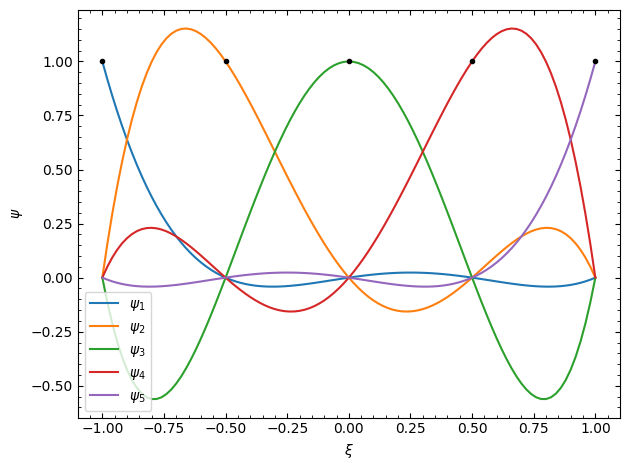

In [3]:
fig, ax = gm.utilities.plot_basis(basis);

## Basis functions from Legendre node coordinates
The `Basis.Legendre` class method can be used to instantiate `Basis` object with node coordinates that correspond to Legendre roots. The node coordinates are stored in the `Basis.xi` attribute. For example, using 5 nodes:

In [4]:
n_nodes = 5
basis = gm.Basis.Legendre(n_nodes)
basis.xi

Array([-0.90617985, -0.5384693 ,  0.        ,  0.5384693 ,  0.90617985],      dtype=float32)

As expected, the basis functions differ from the case of uniformly distributed nodes:

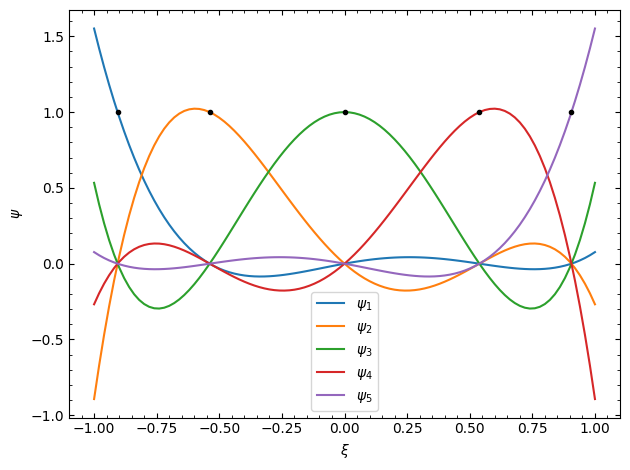

In [5]:
fig, ax = gm.utilities.plot_basis(basis);

## Approximation of a function using polynomial basis functions
The class method `Basis.f` approximates a function given its values at the nodes of the basis.

For example, consider the function:
$$
f(\xi) = \sin(2 \pi \xi)
$$

In [6]:
f = lambda _eta: jnp.sin(2 * jnp.pi * _eta)

The approximation becomes more accurate as the number of nodes increases:

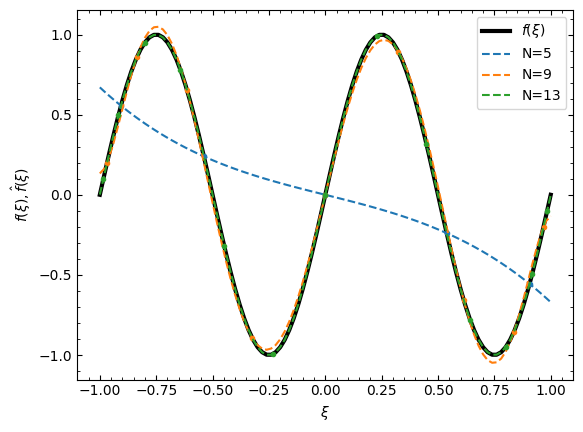

In [7]:
fig, ax = plt.subplots()
ax = gm.utilities._format_axis(ax, axis_labels=[r'$\xi$', r'$f(\xi), \hat{f}(\xi)$'])

_xi = jnp.linspace(-1., 1., num=101)
ax.plot(_xi, f(_xi), 'k-', lw=3, label=r'$f(\xi)$');
for n_nodes in [5, 9, 13]:
    basis = gm.Basis.Legendre(n_nodes)
    _f_nodes = f(basis.xi)
    _f = basis.f(_xi, _f_nodes)
    line = plt.plot(_xi, _f, '--', label=f'N={n_nodes}');
    ax.plot(basis.xi, _f_nodes, '.', color=line[0].get_color());
ax.legend();

While it is tempting to increase the number of nodes to get a better approximation of the function, using too many nodes can lead to numerical instabilities:

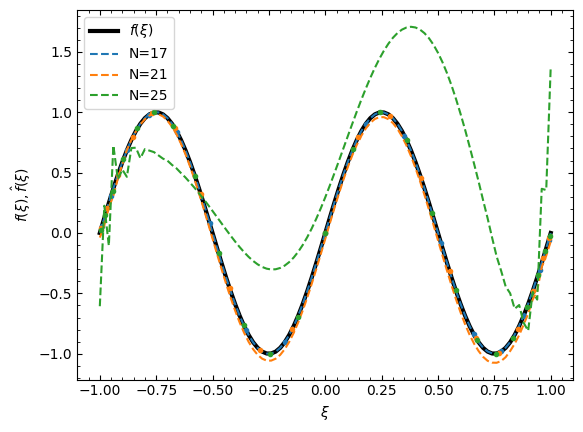

In [8]:
fig, ax = plt.subplots()
ax = gm.utilities._format_axis(ax, axis_labels=[r'$\xi$', r'$f(\xi), \hat{f}(\xi)$'])

_xi = jnp.linspace(-1., 1., num=101)
ax.plot(_xi, f(_xi), 'k-', lw=3, label=r'$f(\xi)$');
for n_nodes in [17, 21, 25]:
    basis = gm.Basis.Legendre(n_nodes)
    _f_nodes = f(basis.xi)
    _f = basis.f(_xi, _f_nodes)
    line = plt.plot(_xi, _f, '--', label=f'N={n_nodes}');
    ax.plot(basis.xi, _f_nodes, '.', color=line[0].get_color());
ax.legend();